In [7]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [8]:
df = pd.read_csv("data-2021-09-07 10:31:17.073334")

In [9]:
df.head()

,name,date,content
0,심*태,2021-09-07 10:30,자유여행을 떠나고 십다.
1,손*인,2021-09-07 10:27,아이들에게 천천히 가는 여행을 선물하고 싶습니다. 돌아보니 자연과 함께하던 그 소중...
2,v*****************m,2021-09-07 10:25,벗어나보고 싶습니다 이 일상에서 10년동안 반복되는 일상에서
3,권*름,2021-09-07 10:20,6년 연애 끝에 결혼하게 되었습니다. 코로나 시국이라 최대한 늦게 결혼하려고 날은 ...
4,박*현,2021-09-07 09:53,코시국이 길어지면서 여행은 더더욱 간절해 지네요 가족들 접종도 거의 끝나가니 이젠 ...


In [10]:
df.shape

(1582, 3)

In [11]:
# 결측치
df.isnull().sum()

name       0
date       0
content    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     1582 non-null   object
 1   date     1582 non-null   object
 2   content  1582 non-null   object
dtypes: object(3)
memory usage: 37.2+ KB


In [13]:
df['content'][0]

'자유여행을 떠나고 십다.'

In [14]:
df['content'][100]

'부모님이 작년에 동창들과 여행 가기로했는데 코로나 때문에 취소 됐거든요 부모님에게 여행 보내드리고싶어요 한번도 효도한적이 없어서 효도하고싶네요'

In [15]:
# 전처리

import re
from pykospacing import Spacing
spacing = Spacing()

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')
    result = hangul.sub(' ', text)
    result = spacing(result)

    return result

In [16]:
apply_regular_expression(df['content'][602])

'당연히 지금 코로나 때문에 여행을 자유롭게 못한 것도 있지만 요즘은 농사짓는다고 건강도 많이 나빠져 하루가 멀다 하고 치료 받는다고 우울하네요 모두가 힘든 시기라 나 하나만 생각할 수도 없으니 그냥 힘드네요 기회가 된다면 우리 가족들 같이 편하게 며칠이라도 여행 가는 게 희망이 되어 버렸어요 아들이 하선하면 같이 조식 신경 써지 않아도 되는 여행 가고 싶어요'

In [17]:
from konlpy.tag import Hannanum, Komoran
from collections import Counter

In [18]:
tagger = Hannanum()  # 명사 형태소 추출 함수
index = 3
print(df['content'][index])
print('--------------------------------------------------------')
print(apply_regular_expression(df['content'][index] + '' + df['content'][index+1]))

nouns = tagger.nouns(apply_regular_expression(df['content'][index] + '' + df['content'][index+1]))
nouns

6년 연애 끝에 결혼하게 되었습니다. 코로나 시국이라 최대한 늦게 결혼하려고 날은 잡았는데 벌써 그 날짜가 다가왔네요 11월 결혼 예정인데 아직도 허니문 갈지 말지 고민 중에 있습니다. 노랑의 도움으로 어디든 떠나고 싶네요 ^^
--------------------------------------------------------
년 연애 끝에 결혼하게 되었습니다 코로나 시국이라 최대한 늦게 결혼하려고 날은 잡았는데 벌써 그 날짜가 다가 왔네요 월 결혼 예정인데 아직도 허니문 갈지 말지 고민 중에 있습니다 노랑의 도움으로 어 디든 떠나고 싶네요 코시국이 길어지면서 여행은 더더욱 간절해 지네요 가족들 접종도 거의 끝나가니 이 젠 가족들과의 추억 만들 멋진 여행 노랑풍선과 함께  하고 싶어요


['년',
 '연애',
 '끝',
 '결혼',
 '코',
 '시국',
 '결혼',
 '날',
 '날짜',
 '다',
 '월',
 '결혼',
 '예정',
 '허니문',
 '고민',
 '중',
 '노랑',
 '도움',
 '어',
 '디',
 '코시국',
 '여행',
 '간절',
 '지',
 '가족들',
 '접종',
 '젠',
 '가족들',
 '추억',
 '여행',
 '노랑풍선']

In [19]:
total_nouns = []
start = 0
end = 1
while True:
    if (start == df.shape[0]):
        break
    print('--------------------------------------------')
    print(f'--------------{start} to {end} processing---')
    print('--------------------------------------------')

    corpus = " ".join(df['content'][start:end].tolist())
    nouns = tagger.nouns(apply_regular_expression(corpus))
    total_nouns += nouns
    start = end
    end = end + 10
    if (end > df.shape[0]):
        end = df.shape[0]
    

--------------------------------------------
--------------0 to 1 processing---
--------------------------------------------
--------------------------------------------
--------------1 to 11 processing---
--------------------------------------------
--------------------------------------------
--------------11 to 21 processing---
--------------------------------------------
--------------------------------------------
--------------21 to 31 processing---
--------------------------------------------
--------------------------------------------
--------------31 to 41 processing---
--------------------------------------------
--------------------------------------------
--------------41 to 51 processing---
--------------------------------------------
--------------------------------------------
--------------51 to 61 processing---
--------------------------------------------
--------------------------------------------
--------------61 to 71 processing---
--------------------------------

--------------------------------------------
--------------631 to 641 processing---
--------------------------------------------
--------------------------------------------
--------------641 to 651 processing---
--------------------------------------------
--------------------------------------------
--------------651 to 661 processing---
--------------------------------------------
--------------------------------------------
--------------661 to 671 processing---
--------------------------------------------
--------------------------------------------
--------------671 to 681 processing---
--------------------------------------------
--------------------------------------------
--------------681 to 691 processing---
--------------------------------------------
--------------------------------------------
--------------691 to 701 processing---
--------------------------------------------
--------------------------------------------
--------------701 to 711 processing---
-------------

--------------------------------------------
--------------1291 to 1301 processing---
--------------------------------------------
--------------------------------------------
--------------1301 to 1311 processing---
--------------------------------------------
--------------------------------------------
--------------1311 to 1321 processing---
--------------------------------------------
--------------------------------------------
--------------1321 to 1331 processing---
--------------------------------------------
--------------------------------------------
--------------1331 to 1341 processing---
--------------------------------------------
--------------------------------------------
--------------1341 to 1351 processing---
--------------------------------------------
--------------------------------------------
--------------1351 to 1361 processing---
--------------------------------------------
--------------------------------------------
--------------1361 to 1371 processing-

In [20]:
len(total_nouns)

36128

In [21]:
counter = Counter(total_nouns)

In [40]:
remove = ['코','년','풍선','수','것','저', '노랑', '주년', '노랑풍선','번', '나','전','때','기','지','월','곳','중','시','로','날',
          '후', '저희','우리','데','내','이','대','한','앞','세','거','여','축', '두', '들','적', '등' , '둘', '말', '속','바', '분','ㅠ',
          'ㅠㅠ','라','을', '몇', '어','의','살','줄','도','해','ㅎㅎ', '만','글','리','듯','위','초','되','그','부','남'
          ,'ㅎ', '뿐','ㅜㅜ','를', '밖', '디', '숨','겸','유','고','뭐', '여행', '코로나','때문']
for w in remove:
    try:
        counter.pop(w)
    except:
        pass
counter.most_common(1000)

[('가족', 310),
 ('일', 304),
 ('마음', 285),
 ('엄마', 239),
 ('시간', 224),
 ('결혼', 224),
 ('추억', 214),
 ('해외여행', 197),
 ('기회', 175),
 ('생각', 169),
 ('올해', 158),
 ('집', 157),
 ('남편', 156),
 ('아들', 133),
 ('행복', 126),
 ('감사', 121),
 ('해외', 121),
 ('제주', 120),
 ('이벤트', 117),
 ('국내', 113),
 ('부모님', 113),
 ('축하', 111),
 ('이번', 108),
 ('계획', 103),
 ('어머니', 102),
 ('작년', 99),
 ('유럽', 99),
 ('딸', 99),
 ('아내', 97),
 ('동안', 93),
 ('사랑', 93),
 ('아이들', 91),
 ('일상', 91),
 ('선물', 90),
 ('당첨', 89),
 ('사람', 88),
 ('삶', 87),
 ('한번', 87),
 ('아이', 85),
 ('자유', 83),
 ('환갑', 83),
 ('생활', 80),
 ('휴가', 80),
 ('친구', 77),
 ('상황', 75),
 ('내년', 74),
 ('예약', 74),
 ('가족들', 73),
 ('부부', 73),
 ('지금', 72),
 ('시작', 71),
 ('몸', 71),
 ('힐링', 70),
 ('그동안', 70),
 ('첫', 70),
 ('꿈', 69),
 ('고생', 69),
 ('아버지', 67),
 ('하루', 67),
 ('여행사', 66),
 ('어디', 65),
 ('호텔', 64),
 ('기념', 64),
 ('마지막', 61),
 ('준비', 61),
 ('신혼여행', 59),
 ('종식', 58),
 ('비행기', 57),
 ('기억', 56),
 ('진심', 55),
 ('가지', 55),
 ('건강', 54),
 ('창립', 54),
 ('친구들', 54),
 ('백신

In [41]:
one_len_word = []

for c in counter:
    if len(c[0]) == 1:
        one_len_word.append(c[0])

In [42]:
len(one_len_word)

5194

In [50]:
counter.most_common(9999999999999999)

[('가족', 310),
 ('일', 304),
 ('마음', 285),
 ('엄마', 239),
 ('시간', 224),
 ('결혼', 224),
 ('추억', 214),
 ('해외여행', 197),
 ('기회', 175),
 ('생각', 169),
 ('올해', 158),
 ('집', 157),
 ('남편', 156),
 ('아들', 133),
 ('행복', 126),
 ('감사', 121),
 ('해외', 121),
 ('제주', 120),
 ('이벤트', 117),
 ('국내', 113),
 ('부모님', 113),
 ('축하', 111),
 ('이번', 108),
 ('계획', 103),
 ('어머니', 102),
 ('작년', 99),
 ('유럽', 99),
 ('딸', 99),
 ('아내', 97),
 ('동안', 93),
 ('사랑', 93),
 ('아이들', 91),
 ('일상', 91),
 ('선물', 90),
 ('당첨', 89),
 ('사람', 88),
 ('삶', 87),
 ('한번', 87),
 ('아이', 85),
 ('자유', 83),
 ('환갑', 83),
 ('생활', 80),
 ('휴가', 80),
 ('친구', 77),
 ('상황', 75),
 ('내년', 74),
 ('예약', 74),
 ('가족들', 73),
 ('부부', 73),
 ('지금', 72),
 ('시작', 71),
 ('몸', 71),
 ('힐링', 70),
 ('그동안', 70),
 ('첫', 70),
 ('꿈', 69),
 ('고생', 69),
 ('아버지', 67),
 ('하루', 67),
 ('여행사', 66),
 ('어디', 65),
 ('호텔', 64),
 ('기념', 64),
 ('마지막', 61),
 ('준비', 61),
 ('신혼여행', 59),
 ('종식', 58),
 ('비행기', 57),
 ('기억', 56),
 ('진심', 55),
 ('가지', 55),
 ('건강', 54),
 ('창립', 54),
 ('친구들', 54),
 ('백신

In [71]:
dd = pd.DataFrame(counter.most_common(9999999), columns=['keyword','count'])
dd.to_csv('output.csv')

In [61]:
import matplotlib.font_manager

Text(0, 0.5, 'Frequency')

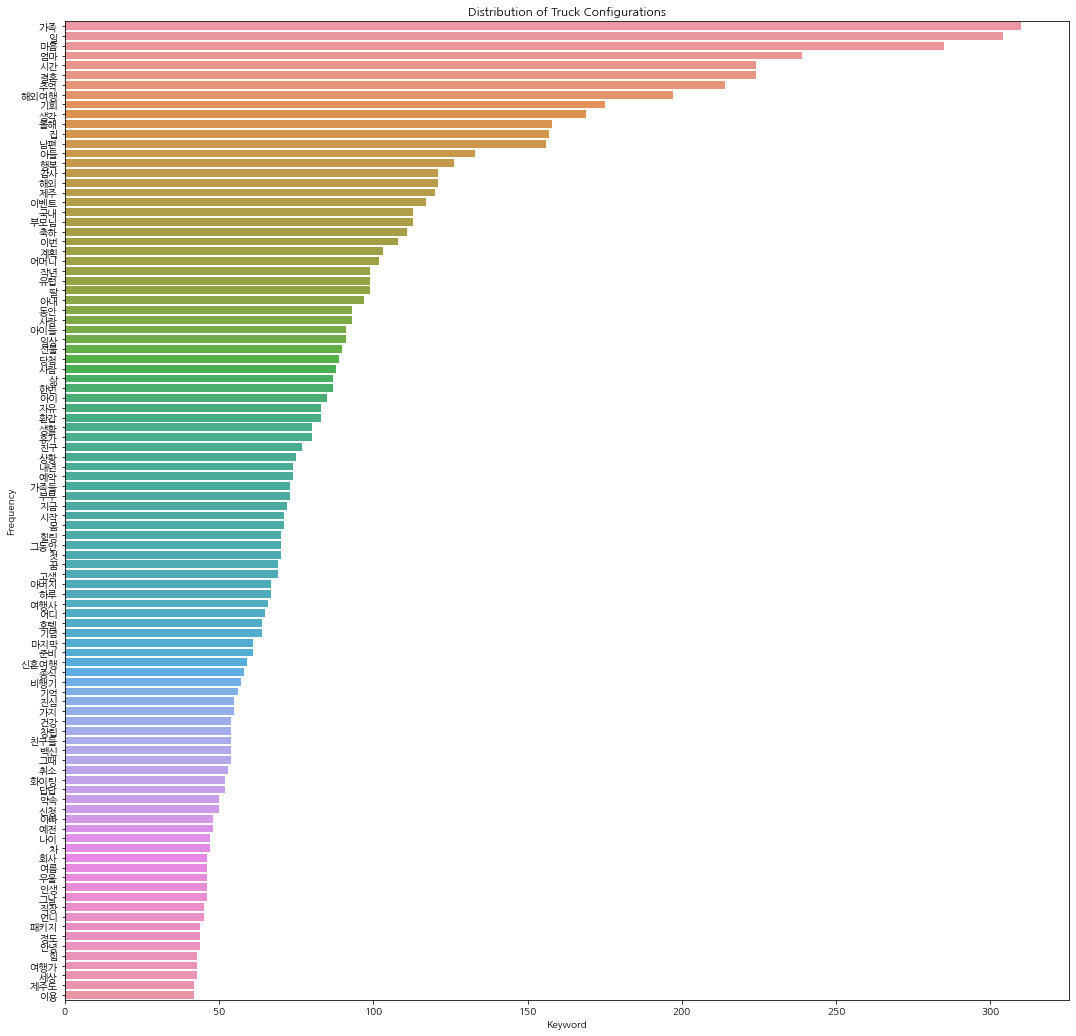

In [62]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(2^16,2^16))
ax = sns.barplot(x='count',y='keyword', data=dd)
plt.title('Distribution of Truck Configurations')
plt.xlabel('Keyword')
plt.ylabel('Frequency')


In [69]:
fig = ax.get_figure()
fig.savefig('output.png')